In [57]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
from scipy.optimize import fsolve
import scipy as sp
from scipy.integrate import quad
from scipy.integrate import odeint
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

Assume we have the one dimensional process model

xi = αxi−1 + δi
, with δi ∼ N (0, q2), i = 1, · · · , N,

and x0 is from a standard normal distribution. Assume the data model is

yi = hxi + εi

, with εi ∼ N (0, r2), i = 1, · · · , N, (2)
1).Write Python function called Process that takes α, N, q and return the array of xi

2.Write Python function called Data that takes array of xi
, r, h and return the array of yi
.

3 Write a program to plot the data on the same graph as the process model, for

r = 0.1, h = 1, α = 0.8, N = 30, q = 0.4 (3)

4.Run your code multiple times and describe what is happening.

5.Now fix the seed using the function (random.seed) and run your code multiple times and describe what is happening.

6.Use the general formulas given for the Kalman filter to find the one dimensional formulas
for

μ1|0, σ1|0, k1, μ1|1, σ1|1, (4)

in term of α, q, r, h and y1

7.Using the general formulas given for the Kalman filter, write Python program to calculate

μi|i−1, σi|i−1, ki
, μi|i
, σi|i
, (5)
for i = 1, · · · , N. Be sure to initialize the loop over i. Hint: I suggest using mu old[i] for
μi|i−1, sigma old[i] for σi|i−1, mu new[i] for μi|i

, sigma new[i] for σi|i

8.Identify the variables in your program that give
(a) a filtered estimate of the state and its uncertainty,

(b) a forecast of the state and its uncertainty.

9.Write a Python program to plot the states xi and data yi together with the filtered and
forecasted estimates on the same graph.

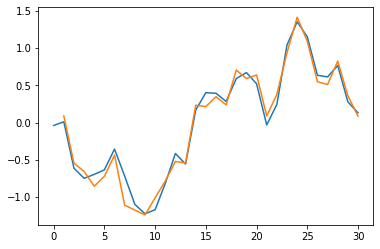

In [9]:
#Filtering

#no.1
def Process(a,N,q):
    x=np.zeros(N+1)
    x[0]=np.random.normal(0,1)
    for i in range(1,N+1):
        x[i]=a*x[i-1]+np.random.normal(0,q)
    return x


#no.2
def Data(x,r,h):
    y=h*x[1:]+np.random.normal(0,r,len(x)-1)
    return y

#no.3, 4 and no.5 np.seed(10)
x=Process(0.8,30,0.4)
y=Data(x,0.1,1)
plt.plot(np.arange(0,len(x)),x)
plt.plot(np.arange(1,len(x)),y)
plt.show()


In [10]:
#no.6 and no.7

def fs(al,N,q,h,r):
    mu_old=np.empty(N)
    mu_new=np.empty(N)
    k=np.empty(N+1)
    k[0]=h*(q+al**2)*(h**2*(q+al**2)+r)**(-1)
    sigma_new=np.empty(N)
    sigma_old=np.empty(N)
    sigma_old[0]= q+al**2
    sigma_new[0]=(1-k[1]+h)*(q+al**2)
    mu_new[0]=k[1]*y[1]-k[1]*h*(q+al**2)
    mu_old[0]=0
    
    for i in range(1,N):
        mu_old[i]=al*mu_new[i-1]
        sigma_old[i]=q+al*sigma_new[i-1]*al
        k[i]=sigma_old[i]*h*(h*sigma_old[i]*h+r)**(-1)
        mu_new[i]=mu_old[i]+k[i]*(y[i]-h*mu_old[i])
        sigma_new[i]=(1-k[i]*h)*sigma_old[i]
        
    return mu_new ,sigma_new, mu_old, sigma_old

#no.8

mu_new, sigma_new, mu_old, sigma_old= fs(0.8,30,0.4,1,0.1) 
print("forcasted are",mu_new, sigma_new)
print("filtred are",mu_old, sigma_old)

#no.9

plt.plot(np.arange(1,len(x)),np.random.normal(mu_old,sigma_old))
plt.plot(np.arange(1,len(x)),np.random.normal(mu_new,sigma_new))
plt.plot(np.arange(0,len(x)),x)
plt.plot(np.arange(1,len(x)),y)

plt.show()

forcasted are [-1.58215544 -0.60423238 -0.62366216 -0.78771796 -0.70255847 -0.45735554
 -0.97271731 -1.10044887 -1.17243599 -0.99461995 -0.78469784 -0.53946098
 -0.52038053  0.11736618  0.19502134  0.31431551  0.2420293   0.61459944
  0.57441424  0.60852351  0.16327132  0.33551008  0.81921863  1.27810634
  1.08089659  0.60656814  0.50825362  0.75106349  0.4036657   0.13203531] [1.04       0.09142073 0.08209519 0.08190179 0.08189774 0.08189765
 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765
 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765
 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765
 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765]
filtred are [ 0.         -1.26572435 -0.48338591 -0.49892973 -0.63017437 -0.56204678
 -0.36588443 -0.77817385 -0.88035909 -0.93794879 -0.79569596 -0.62775827
 -0.43156878 -0.41630443  0.09389294  0.15601707  0.25145241  0.19362344
  0.49167956  0.45953139  0.48681881  0.13061705  0.2

1. Load the titanic dataset from the seaborn package. 
2. Count the number of missing values in each column 
3. Clean the dataset by removing every record that contains a missing value? 
4. What is the size of the clean dataset? 
5. Count the number of survived females 
6. Compute the average age of males who did not survived? 
7. Reproduce the following three figures 



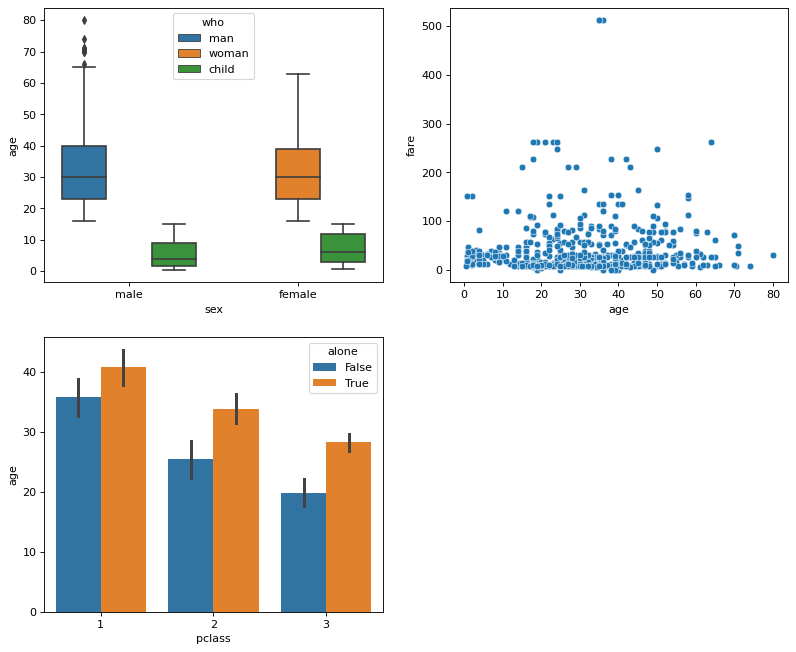

In [3]:
#01.
titanic_df = sns.load_dataset("titanic")
#titanic_df 

#02. # rturns number of mising values in each column

titanic_df.isnull().sum()

# 03. #drops the column and makes changes in the original data
# titanic_df.dropna(axis=0,inplace=True)

titanic_df.drop(columns=['deck'], inplace=True)

#03. #drops raws containihg nul 

titanic_df.dropna(axis=0, inplace=True)

#04 size
titanic_df.shape
    
# 05.Number of survived females
titanic_df.groupby(by=["survived", "sex"]).count().iloc[2,0]

titanic_df.loc[(titanic_df["sex"]=='female') & (titanic_df["survived"]== 1)].shape[0]

#06. 
titanic_df.groupby(by=["sex", "survived"])["age"].mean()[2]

#titanic_df.loc[(titanic_df["sex"]=='male') & (titanic_df["survived"]== 0)].shape[0]

#07.Reproduce the following three figures

plt.figure(figsize=(12, 10), dpi=80)
plt.subplot(2,2,1)
sns.boxplot(x="sex", y="age", hue="who", data=titanic_df)

plt.subplot(2,2,2)
sns.scatterplot(x="age", y="fare", data=titanic_df)

plt.subplot(2,2,3)
sns.barplot(x="pclass", y="age", hue="alone", data=titanic_df)

plt.show()

1. import matlplot, pandas and seaborn packages 
2. set context of seaborn theme to poster 
3. load the diamonds dataset from seaborn package 
4. how many columns in this dataset? 
5. list the names of all columns and describe the datatype of each column? 
6. list the unique number of diamond colors in this dataset? 
7. what is the minimum depth of diamond? 
8. count the diamonds by their clarity and cut? 
9. list the color, clarity, and prices of the most expensive diamond? 
10. produce the following figures? 
11. build a regression model using carat, depth, x, y, and z columns as explana tory variables and price column as response variable, and report its accuracy using mean squared error metric? 


   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
Number of col:  10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        539

<AxesSubplot:xlabel='x', ylabel='price'>

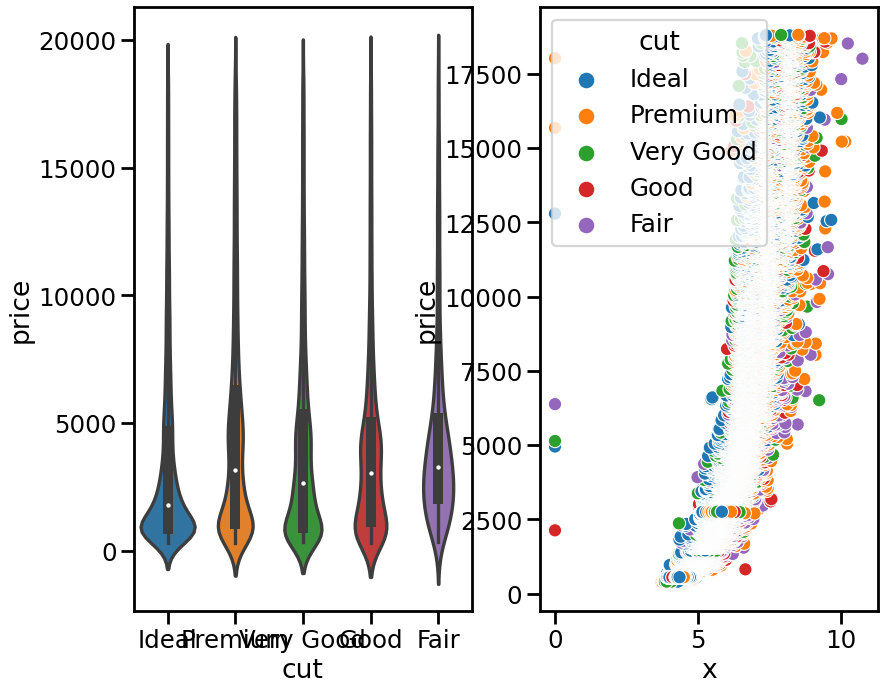

In [26]:
# 1.

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#2.# set context of seaborn theme to poster 

sns.set_context("poster")

# 3.
# load the diamonds dataset from seaborn package
diamond = sns.load_dataset('diamonds')
print(diamond.head())

# 4.how many columns in this dataset?
print("Number of col: ", diamond.columns.size)

# 5. list the columns and describe the datatype of each column?
print(diamond.info())

# 6.list the unique number of diamond colors in this dataset?
print("colors: ",list(diamond['color'].values.unique()))

# 7.what is the minimum depth of diamond?

print("minimum depth of diamond: ",diamond['depth'].min())

# 8.count the diamonds by their clarity and cut?

number=diamond.groupby(by=['clarity','cut']).count()
#print(number)
number['Number']=number.x.values
number.loc[:,['Number']]

# 9. list the color, clarity, and prices of the most expensive diamond? 

most_exp= diamond['price'].max()
#print(most_exp)
diamond[diamond['price']==most_exp][['color','clarity','price']]

# 10.produce the following figures? 

plt.figure(figsize=(12, 10), dpi=80)
plt.subplot(1,2,1)
sns.violinplot(x='cut',y='price',data=diamond)
plt.subplot(1,2,2)
sns.scatterplot(x='x',y='price',hue='cut',data=diamond)

Visualization and matplotlib

In [31]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 1000)   # generating 100 evenly space numbers between 0 and 10 
y = np.sin(x)
plt.plot(x, y) # calling for the plot function on x and sin(x)
plt.show()  # calling for the show function

#plt.style.use('classic')
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
fig.savefig('my_figure.png')   # calling savefig function to save the plot

# For short, you can use the following codes:
plt.plot(x, x + 0, linestyle='-')  # solid
plt.plot(x, x + 1, linestyle='--') # dashed
plt.plot(x, x + 2, linestyle='-.') # dashdot
plt.plot(x, x + 3, linestyle=':');  # dotted

plt.plot(x, x + 0, color='black')  
plt.plot(x, x + 1, color='green') 
plt.plot(x, x + 2, color='red') 
plt.plot(x, x + 3, color='blue')
plt.show()

#combination
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r'); # dotted red

plt.xlim(-1, 11)         # changing the limits of the x-axis
plt.ylim(-1.5, 1.5);     # changing the limits of the y-axis
plt.axis([-1, 11, -1.5, 1.5]);  # alternative approach to changing the limit of the axes

plt.axis('equal');  # equal option creates a 1:1 aspect ratio

plt.title("A Sine Curve")  # adding title of the plot
plt.xlabel('x')            # adding label for the x-axis of the plot 
plt.ylabel('sin(x)');      # adding label for the y-axis of the plot 

plt.plot(x, np.sin(x), '-g', label='sin(x)')   # adding the label argument for plot 1
plt.plot(x, np.cos(x), ':b', label='cos(x)')   # adding the label argument for plot 2
plt.legend(); # calling for the legend

# showing a scatter plot with `plot` function
plt.plot(x, np.sin(x), 'ok');

data = np.random.randn(1000) # generating random normal numbers
plt.hist(data); # plotting histogram

# tuning histogram plot
plt.hist(data, bins=30, alpha=0.5, histtype='stepfilled', edgecolor=None);

#combination of histogram

x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
plt.hist(x1, histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x2, histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x3, histtype='stepfilled', alpha=0.3, bins=40);

plt.legend(loc='upper right'); # adding positional argument to legend
plt.legend(loc='lower center', ncol=2, title='keys');

plt.figure().subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')
    
    #subplot
plt.figure(figsize=(15,6))
plt.subplot(2, 3, 1)
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, 2)
plt.plot(x, np.sin(x) + 3, '--b')
plt.subplot(2, 3, 3)
plt.plot(x, np.sin(x) + 0, ':r')
plt.subplot(2, 3, 4)
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')
plt.subplot(2, 3, 6)
plt.plot(x, np.sin(x) + 0, '>y');
    
   #combined
plt.figure(figsize=(15,6))
plt.subplot(2, 3, (1,2))
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, (3,6))
plt.plot(x, np.sin(x) + 0, ':r')
plt.subplot(2, 3, 4)
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')

 # Text and Annotation 
plt.axis([0, 10, 0, 10])
plt.text(1, 5, "Data (1, 5)")
plt.text(0.5, 0.1, "Point (0.5, 0.1)")
plt.text(6, 7.5, "Gradient (0.2, 0.2)")

x = np.linspace(0, 20, 1000)
plt.plot(x, np.cos(x))
plt.axis('equal')
plt.annotate('local maximum', 
             xy=(6.28, 1), 
             xytext=(10, 4), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('local minimum', 
             xy=(5 * np.pi, -1), 
             xytext=(2, -6),
             arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"));
    

plt.style.available? #showing styles
plt.style.use('seaborn')
#plt.scatter?


SyntaxError: invalid syntax (2736153564.py, line 105)

Numpy and scipy

In [ ]:
#Vectorization
def f1(x):
    if x > 0:
        return 2*x
    else:
        return 1+x

z = np.linspace(-5,5,3) 
g1 = np.vectorize(f1)
g1(z)


A.min()
A.max()
A.sum()
A.prod()
A.mean()
A.std()
np.dot(a,b)   # dot product = inner product=scalar product
a@b   
np.multiply(m,n)   # component-wise multiplication,equal to m*n
np.diagonal(m)    # return the elements on the diagonal
np.trace(m) # return trace or the sum of the diagonal elements
m.T #return the transpose of a function
np.linalg.det # to find out about the function det
np.linalg.inv # to find out about the function inv
e_values, e_vectors = np.linalg.eig(a) # returns the eigenvalues and right
# eigenvector of a square array

P = np.poly1d([2,-1, 0, -5])#coefficient of polynomial
np.poly1d(P)#print values of p

#System of Equations in Python    

A = np.array([ [3,-9], [2,4] ])
b = np.array([-42, 2])
z = np.linalg.solve(A,b)
x=z[0],y=z[1]

# system of non-linear equations
import scipy as sp
sp.optimize.fsolve
def myFunction(z):
    x = z[0]
    y = z[1]
    w = z[2]

    F = np.empty((3))
    F[0] = x**2+y**2-20
    F[1] = y - x**2
    F[2] = w + 5 - x*y
    return F

zGuess = np.array([0,1,1])
g = fsolve(myFunction,zGuess)
print(g)

#Integrals in python

a1, a2 = 0,3
b1, b2 = 2,5

f1 = lambda x: (x**3+5*x-20)/(x**2+3)
f2 = lambda x: (x - (1/3)) * np.sqrt(x**4 - 3)

A = quad(f1,a1,b1)[0]
B = quad(f2,a2,b2)[0]

#Fumction trap
def Trap(a,b,f, H=0.001):
    N = int((b-a)/H)
    t = np.linspace(a,b, N+1)
    Z = 0
    for i in range(1,len(t)):
        Z += ((f(t[i-1]) + f(t[i]))/2)*H
    return Z

#calling function trap
f1 = lambda x: (x**3+5*x-20)/(x**2+3)
f2 = lambda x: (x-(1/3))*np.sqrt(x**4-3)

print("A: ", Trap(0,2,f1))
print("B: ", Trap(3,5, f2))

#Solve system of ODEs in Python

# function that returns dz/dt
def model(z,t):
    x,y = z
    dxdt = 5*x-3*y 
    dydt = -6*x +2*y
    return np.array([dxdt,dydt])

# initial condition
z0 = np.array([1,2])

# time points
a = 0
b = 1
N = 100
t = np.linspace(a,b,N+1)

# solve ODE
z = odeint(model,z0,t)

x = z[:,0]
y = z[:,1]


**Exercise 4** <font color=red>(21/21) **_Excellent_** </font>

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let consider the second-order differential equation

\begin{equation}
  \begin{cases}
   \dfrac{d^2 y}{dx^2} + 2\dfrac{d y}{dx}=30e^{3x} \qquad\forall x\in [a,b]\\\\
\dfrac{d y}{dx}(a)=8 , y(a) = 2 
  \end{cases}
\end{equation}

Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.

1- Using the Python in-built function **odeint**, write a python function <b> SODE </b> that takes $a,b,H$ (with $H= 0.001$ as default value) and return array of all $x_k$ and $y_k$

- <font color=blue>Your function name should be **SODE** not **SODA**  </font>

- <font color=blue>According to the problem you may consoder to have function **function** inside the function **SODA**  </font>

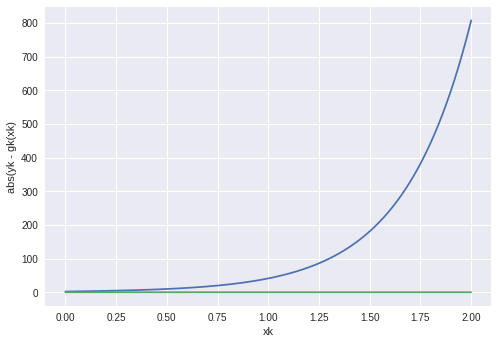

In [37]:
def SODE(a,b,H):
    # initial condition
    y0 = [2,8]
    
    # syst of odes
    def models(y,x):
        y,z = y
        dydx = z
        dzdx = 30*np.exp(3*x)-2*z
        return np.array([dydx,dzdx])

    # time points
    N = int((b-a)/H + 1)
    t = np.linspace(a,b,N)
    u = odeint(models,y0,t)
    return t, u[:,0]


#plot
t,ysol = SODE(0,2,0.001)
plt.plot(t,ysol)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
#Exact solution

g = 2*np.exp(3*t) - np.exp(-2*t) + 1
e = np.absolute(ysol-g)
# plt.plot(t,ysol,t,g)
plt.plot(t,e)
plt.xlabel('x')
plt.ylabel('|y(x)-g(x)|')
plt.show()

#3pt h:vecotrization
def L2_error(a,b,H):
    x,ysol = SODE(a,b,H)
    g = 2*np.exp(3*x) - np.exp(-2*x) + 1
    L2Er = (H*(ysol - g)**2)
    return sum(L2Er)

#l2erro

Hj = np.array([10**-1,10**-2,10**-3,10**-4])
L2Erj = []
for i in Hj:
    L2Erj = np.append(L2Erj,L2_error(0,2,i))
print(L2Erj)

plt.plot(Hj,L2Erj)
plt.xlabel('Hj')
plt.ylabel('L2Erj')
plt.show()




**Exercise 6**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    y' = f(x,y),      & \quad \text{on } [a, b]\\&\qquad\qquad\qquad (1)\\
    y(a) = c,
  \end{cases}
\end{equation}
Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.
1. Write a python function <b> EulerMethod </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using Euler method i.e.
$$ y_{k+1} = y_k + Hf(x_k,y_k) $$


In [44]:
def EulerMethod(a,b,c,N,f):
    X=np.linspace(a,b,N+1)
    Y=np.zeros(N+1)
    Y[0]=c
    H=int((b-a)/N)
    for k in range(N):
        Y[k+1]=Y[k]+H*f(X[k],Y[k])
    return X,Y
        
def RK2Method(a,b,c,N,f):
    X=np.linspace(a,b,N+1)
    Y=np.zeros(N+1)
    Y[0]=c
    H=int((b-a)/N)
    for k in range(N):
        
        Y[k+1]=Y[k]+H*f(X[k]+H/2,Y[k]+(H/2)*f(X[k],Y[k]))
    return X,Y     

3. Let us consider the initial value problem 

\begin{equation}
  \begin{cases}
    y' = 2y + e^{2x},      & \quad \text{on } [0, 1]\\\\
    y(0) = 3,
  \end{cases}
\end{equation}
with exact solution $g(x) = (x+3)e^{2x}$. 

For $N=200$, use subplot to plot side by side
- the exact solution and the approximate solutions obtained with **odeint**, <b> EulerMethod </b> and <b> RK2Method </b>
- the absolute error between the exact solution and the approximate solutions obtained with **odeint**, <b> EulerMethod </b> and <b> RK2Method </b>

In [47]:
f=lambda x,y:2*y+ np.exp(2*x)
g=lambda x:(x+3)*np.exp(2*x)



odeint:


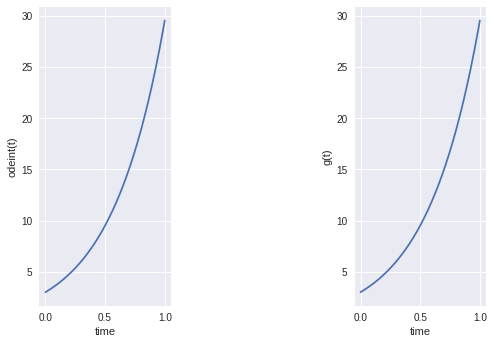

Euler method:


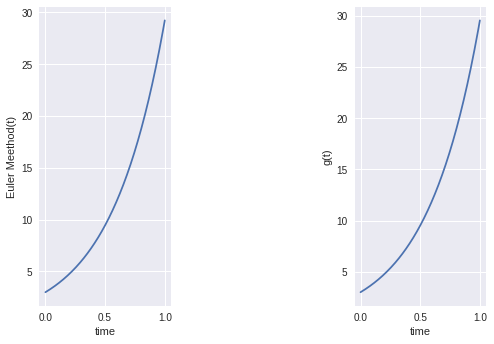

RK2Method:


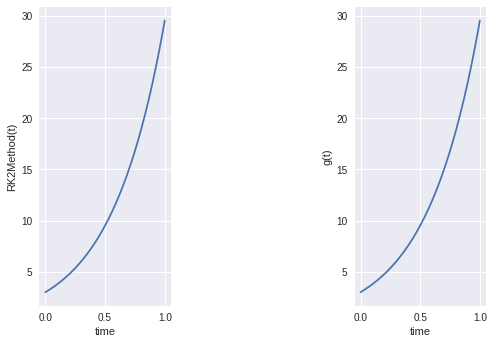

Absolute error:


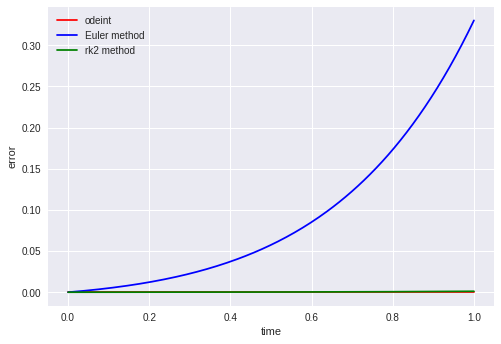

In [48]:
def EulerMethod(f,a,b,c,N):
    x=np.linspace(a,b,N)
    H=x[1]-x[0]
    y=np.empty((N))
    y[0]=c
    for k in range(N-1):
        y[k+1]=y[k]+H*f(x[k],y[k])
    return np.vstack((x,y))


def RK2Method(f,a,b,c,N):
    x=np.linspace(a,b,N)
    H=x[1]-x[0]
    y=np.empty((N))
    y[0]=c
    for k in range(N-1):
        al=f(x[k],y[k])
        y[k+1]=y[k]+H*f(x[k]+H/2,y[k]+(H/2)*al)
    return np.vstack((x,y))


g=lambda x: (x+3)*np.exp(2*x)
a=0
b=1
c=3
N=200
x=np.linspace(a,b,200)


gt=np.array([g(k) for k in x])

print("odeint:")
def model(y,x):
    dydx=2*y+np.exp(2*x)
    return dydx
od=odeint(model,c,x)
plt.subplot(1,3,1)
plt.plot(x,od[:,0])
plt.xlabel('time')
plt.ylabel('odeint(t)')
# plt.show()
# plot results
plt.subplot(1,3,3)
plt.plot(x,gt)
plt.xlabel('time')
plt.ylabel('g(t)')
plt.show()

f=lambda x,y: 2*y +np.exp(2*x)

print("Euler method:")
eu=EulerMethod(f,a,b,c,N)
# plot results
plt.subplot(1,3,1)
plt.plot(x,eu[1])
plt.xlabel('time')
plt.ylabel('Euler Meethod(t)')
# plt.show()
# plot results
plt.subplot(1,3,3)
plt.plot(x,gt)
plt.xlabel('time')
plt.ylabel('g(t)')
plt.show()

print("RK2Method:")
r=RK2Method(f,a,b,c,N)

# plot results
plt.subplot(1,3,1)
plt.plot(x,r[1])
plt.xlabel('time')
plt.ylabel('RK2Method(t)')
# plt.show()
# plot results
plt.subplot(1,3,3)
plt.plot(x,gt)
plt.xlabel('time')
plt.ylabel('g(t)')
plt.show()

print("Absolute error:")
e=np.abs(gt-od[:,0])
eeu=np.abs(gt-eu[1])
erk=np.abs(gt-r[1])
plt.plot(x,e,color="red",label="odeint")
plt.plot(x,eeu,color="blue",label="Euler method")
plt.plot(x,erk,color="green",label="rk2 method")
plt.legend()
plt.xlabel('time')
plt.ylabel('error')
plt.show()


**Exercise 7**

Consider heat conduction in a rod with constant heat conduction properties, $\lambda^2$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -\lambda^2\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{\lambda^2}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,\alpha , \lambda, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [38]:
def MatGenerator(a,b,alpha,lambd,beta,N,g):
    H=(b-a)/N
#     u=np.array([alpha])
    x=np.linspace(a,b,N+1)
    v=((H**2)/(lambd**2))*np.array([g(x[i]) for i in range(N+1)])
    v[0]=alpha
    v[N]=beta
    v
#     w=np.array([beta])
#     b=np.vstack(u,np.vstack(u,w))
    A0 = 2*np.eye(N+1,N+1,k=0)-np.eye(N+1,N+1,k=1)-np.eye(N+1,N+1,k=-1)
    A0[0,0]=1
    A0[0,1]=0
    A0[N,N-1]=0
    A0[N,N]=1
#     A0=A0*((lambd**2)/(H**2))
    
    return A0,v

 #plotting numerical solution   
h=lambda x:-4*(1+x)-np.exp(x)
a=0
b=1
lambd=1
alpha=-4
beta=0
N=100
x=np.linspace(0,1,101)
A=MatGenerator(a,b,alpha,lambd,beta,N,h)[0]
b=MatGenerator(a,b,alpha,lambd,beta,N,h)[1]
U= np.linalg.solve(A,b)
print(A)
print(b)

plt.title("curve by Backward euler")
plt.plot(x,U)
plt.xlabel('x')
plt.ylabel('y')
plt.show()  
    
    
    

Quiz 1

In [1]:
#write a function, called sum_prod, that takes  n  and  m 
def sum_prod(n,m=1):
    A=0
    B=1
    for i in range(m,n+1):
        A+=i
        B*=i
    return A,B
sum_prod(10)

(55, 3628800)

In [2]:
#Write a Python function called Facto that calculates the factorial non-negative integer
def Facto(n):
    return sum_prod(n)[1]
Facto(3)

6

In [5]:
#write a function, ListComp that takes a list  L    
def ListComp(L):
    L1=[]
    l=len(L)
    for i in range(l):
        s=[L[i][j] for j in range(len(L[i])-1)]
        L1.append("".join(s))
    L2=[len(L[i]) for i in range(l)]
    L3=[L[i] for i in range(l) if len(L[i])<=3]
    return L1,L2,L3   
#testing
ListComp(["Ala","Aime","Valera","Salomon","Media"])
#alternative


(['Al', 'Aim', 'Valer', 'Salomo', 'Medi'], [3, 4, 6, 7, 5], ['Ala'])

$\text{Exercise 3} $ (Write our own function and compare it with $odeint$)

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_1<t_2<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_1,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem =\eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$

In [39]:
def  EulerOdeSys(f,c,t):
    N=len(t)
    M=len(c)
    H=t[1]-t[0]
    Z=np.zeros((N,M))
    Z[0]=c
    for k in range(N-1):
        Z[k+1]=Z[k]+H*f(Z[k],t[k])
    return Z  

2. Write a python function <b> RK4OdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the fourth order Runge-Kutta method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+H\dfrac{k_1}{2}, t_k + \dfrac{H}{2}),\\\\
k_3 = f(z_k+H\dfrac{k_2}{2}, t_k + \dfrac{H}{2}),\\\\
k_4 = f(z_k+Hk_3, t_k + H),\\\\
z_{k+1} = z_k + \dfrac{H}{6}(k_1+2k_2+2k_3+k_4)
\end{cases}
\end{equation}

In [41]:
def RK4OdeSys(f,c,t):
    N=len(t)
    M=len(c)
    H=t[1]-t[0]
    Z=np.empty((N,M))
    Z[0]=c
    for k in range(N-1):
        k1=f(Z[k],t[k])
        k2=f(Z[k]+H*(k1/2),t[k]+(H/2))
        k3=f(Z[k]+H*(k2/2),t[k]+(H/2))
        k4=f(Z[k]+H*k3,t[k]+H)
        Z[k+1]=Z[k]+(H/6)*(k1+2*k2+2*k3+k4)
    return Z

3. Solve the system of ODEs in $Exercise2$ using your function <b> EulerOdeSys </b> and <b> RK4OdeSys </b> 

In [ ]:
def model(v,t):
    x1=v[0]
    x2=v[1]
    x3=v[2]
    #x1,x2,x3=v
    dx1dt=-(1/2)*x1
    dx2dt=(1/2)*x1-(1/4)*x2
    dx3dt=(1/4)*x2-(1/6)*x3
    return np.array([dx1dt, dx2dt,dx3dt])
vo=[1,1,1]
t=np.linspace(0,4,200)

# f=model(vo,t)
c=vo
z=EulerOdeSys(model,c,t)
z2=RK4OdeSys(model,c,t)
print("x1=",z2[:,0],"\n\nx2=",z2[:,1],"\n\nx3=",z2[:,2])

$\text{Exercise 4} $

Consider heat conduction in a rod with constant heat conduction properties, $K>0$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -K\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{K}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [42]:
def MatGenerator(g,a,b,alph,bet,K,N):
    H=(b-a)/N
    A= -1*np.eye(N-1,N+1)+ 2*np.eye(N-1,N+1,1) -1*np.eye(N-1,N+1,2)    
    A=(K/H**2)*A
    A0=np.zeros((N+1))
    A0[0]=1
    AN=np.zeros((N+1))
    AN[N]=1
    A=np.vstack((np.vstack((A0,A)),AN))
    x=np.linspace(a,b,N+1)
    b=np.array([g(x[i]) for i in range(1,N)])
    b=np.hstack((np.hstack((alph,b)),bet))
    return A,b

2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, K=1,\alpha = -4, \beta = 0, N= 100 \text{ and } g(x) = -4(1+x)e^x, $$

and plot the numerical solution

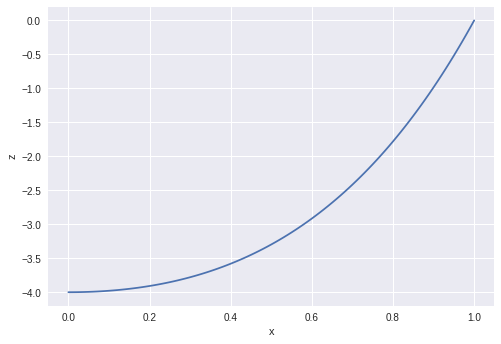

In [43]:
a=0
b=1
K=1
alph=-4
bet=0
N=100
g=lambda x: -4*(1+x)*np.exp(x)
A,b0=MatGenerator(g,a,b,alph,bet,K,N)
z=np.linalg.solve(A,b0)
x=np.linspace(a,b,N+1)
plt.plot(x,z)
plt.xlabel("x")
plt.ylabel("z")
plt.show()

3. The exact solution of the steady-state heat-conduction problem above is $U(x)=4(x-1)e^x$. Use Subplot to plot side by side
    - the exact and approximate solutions against x
    - the absolute error between the exact and the approximate solution against x

Asignment 2

In [49]:
def Fibonacci(n=2):
    L=np.array([1,2])
    i=2
    while L[i-1]<n:
        L=np.append(L,L[i-2]+L[i-1])
        i+=1
    return L[:i-1]
f=Fibonacci(4000000)
s=np.sum(f[f%2==0])
print("The sum of the even-valued terms in the Fibonacci sequence whose values do not exceed four million is", s)

The sum of the even-valued terms in the Fibonacci sequence whose values do not exceed four million is 4613732


In [50]:
s=""
for i in range(1,1000000//2):
    s+=str(i)
d=np.array([int(s[10**i-1]) for i in range(7)])
p=np.prod(d)
print("𝑑1×𝑑10×𝑑100×𝑑1000×𝑑10000×𝑑100000×𝑑1000000=",p)

𝑑1×𝑑10×𝑑100×𝑑1000×𝑑10000×𝑑100000×𝑑1000000= 210


In [51]:
def LeapYear(y):
    if ((y % 4 == 0) and (y % 100 !=0)) or (y % 400 == 0):
        return True
    else:
        return False
def SunYear(y,d):
    M=np.array([31,28,31,30,31,30,31,31,30,31,30,31])
    if LeapYear(y):
        M[1]+=1
    s=0
    for m in M:
        if d%7==0:
            s+=1
        d+=m
    d=d%7
    return d,s
s=0
d=SunYear(1900,1)[0]  
for year in range(1901,2001):
    d0,s0=SunYear(year,d)
    s+=s0
    d=d0
print("The number of sundays that fell on the first of the month during the twentieth century is",s)

The number of sundays that fell on the first of the month during the twentieth century is 171


In [ ]:
def characterCase(s):
    t=""
    for i in s:
        if i.isupper():
            t+=i.lower()
        elif i.islower():
            t+=i.upper()
    return t
s=input("Enter a string: ")
characterCase(s)

In [ ]:
def UpLow(s):
    up=0
    lc=0
    for i in s:
        if i.isupper():
            up+=1
        elif i.islower():
            lc+=1
    return [up, lc]
s=input("Enter a string: ")
UpLow(s)

In [ ]:
def Name(s):
    if not s[0].isupper():
            return False
    for i in range(1,len(s)):
        if not s[i].islower():
            return False
    return True
s=input("enter a string: ")
Name(s)

In [ ]:
def Ename(L):
    for i in range(len(L)):
        n=L[i].split()
        for j in n:
            if Name(j):
                return i
    return -1
L=["test","this is not","a String that","Have","Name"]
print("The first index where the list element contains a name is",Ename(L))

In [ ]:
def MaxNeg(L):
    M=np.array(L)
    if len(M[M<0])>0:
        return np.max(M[M<0])
    return 0
MaxNeg([1,2,3,5,6])

In [ ]:
def MaxNegRow(M):
    M0=[MaxNeg(M[i]) for i in range(M.shape[0])]
    return np.sum(M0)
M=np.array([[1,2,-5,6,-2,-25],
            [-1,-2,5,-6,2,25],
            [1,2,5,6,5,2]])
MaxNegRow(M)

Logistic Regression

In [ ]:
dataset = pd.read_csv("Iris.csv")
dataset.head()
X = dataset[["SepalLengthCm","SepalWidthCm", "PetalLengthCm","PetalWidthCm"]].values.reshape(-1,4)
y = dataset["Species"].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0, multi_class='auto')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)### Print results 
probs_y = np.round(probs_y, 2)
probs_y
result = pd.DataFrame(probs_y, columns= np.unique(dataset.Species))
result.insert(loc=0, column="Test", value=y_test)
result.insert(loc=1, column ='Predicted', value=y_pred)
result.sample(10)

con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)

# confusion matrix sns heatmap 
#ax = plt.axes()
sns.heatmap(con_mat, annot=True, annot_kws={"size": 20},cmap="summer_r", xticklabels=np.unique(dataset.Species),
           yticklabels=np.unique(dataset.Species))
plt.title("Confusion Matrix of the classifier")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

print("Accuracy:",accuracy_score(y_test, y_pred))

Linear regression

In [ ]:
#simple linear regression

df = pd.read_csv('PythonEffect.csv')
# print(df.info())
df.head()

# Simple scatter plot
df.plot(kind='scatter', x='PythonMark', y='ReviewPhaseMark', title='Python Effect')
plt.show()

# Create linear regression object
Single_lr = LinearRegression()
# #Extract 
X= df.PythonMark.values.reshape(-1, 1) # independent variable
Y= df.ReviewPhaseMark.values.flatten() # dependent variable

# split-up our current X & y variables into training
# and testing data.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it
Single_lr.fit(X_train, Y_train)

# get the value of alpha and beta
alpha = Single_lr.coef_
beta = Single_lr.intercept_

# print the value of alpha and beta
print('alpha = ', alpha[0])
print('beta = ', beta)

# Make predictions using the testing set
Y_pred = Single_lr.predict(X_test)

# R-squared
print('R-squared: %.2f' % r2_score(Y_test, Y_pred))
# mean absolute error
print("mean absolute error: %.2f"% mean_absolute_error(Y_test, Y_pred))
# Mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_test, Y_pred))

# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.show()

Multiple linear regression

In [ ]:
# Import the data and inspect it
maths = pd.read_csv('student-mat.csv')
maths.head()

print(maths.info())

corr = maths.corr()
# maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

maths.sex.unique()#this is a categorical variable

maths.famsize.unique()#this is a categorical variable

# # Convert binary variable 'sex' to numeric boolean fields
lb = LabelBinarizer()
maths.sex = lb.fit_transform(maths.sex)
maths.sex.unique()

# # Convert binary variable 'famsize' to numeric boolean fields
maths.famsize = lb.fit_transform(maths.famsize)
maths.famsize.unique()

corr = maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

maths = maths[['sex', 'famsize', 'studytime', 'famrel', 'absences', 'G1', 'G2', 'G3']]


MX = maths[['sex', 'famsize', 'studytime', 'famrel', 'absences', 'G1', 'G2']].values.reshape(-1, 7)
MY = maths['G3'].values.flatten()


# split-up our current X & y variables into training
# and testing data.

MX_train, MX_test, MY_train, MY_test = train_test_split(MX,MY, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it

Multi_lr = LinearRegression()
Multi_lr.fit(MX_train, MY_train)

# Lets take a look at how well this model preforms
print("The R-Squared: ", Multi_lr.score(MX_test, MY_test))
alpha = Multi_lr.coef_
beta = Multi_lr.intercept_

for i in range(alpha.size):
    print(maths.columns[i], ': ', alpha[i])
print('The intercept of our slope is: ', beta)

MY_pred = Multi_lr.predict(MX_test)
print('Mean Absolute Error:', mean_absolute_error(MY_test, MY_pred))  
print('Mean Squared Error:', mean_squared_error(MY_test, MY_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(MY_test, MY_pred)))